# Contents in this notebook
1. Importing data and libraries
2. Creating a bar chart
3. Creating a histogram
4. Creating a scatterplot
5. Creating histogram (2nd try after checking for outliers)
6. Creating line chart

# Import Data and Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining Path
path = r'C:\Users\seann\Downloads\Career Foundry Tasks\12-08-22 Instacart Basket Analysis'

In [3]:
# Importing Orders and Products Merged Data Set
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_new_updated.pkl'))

<AxesSubplot:>

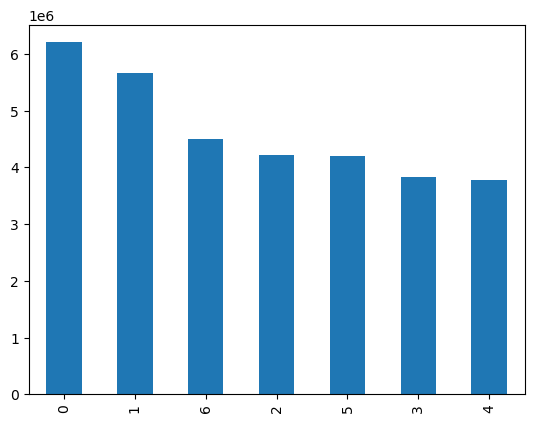

In [4]:
# Creating a Bar Chart
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

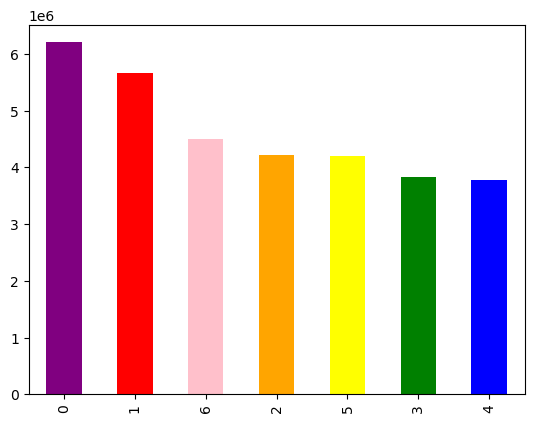

In [5]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

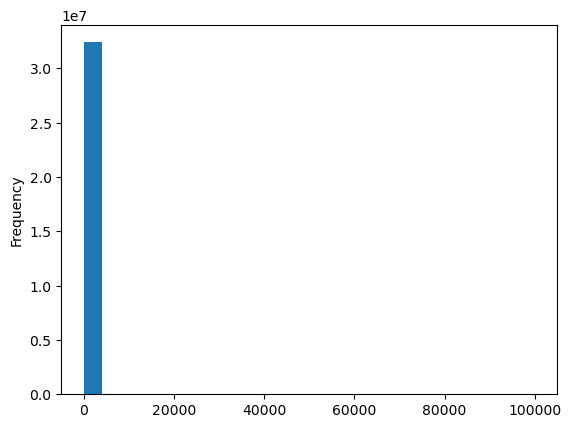

In [7]:
# Creating a Histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

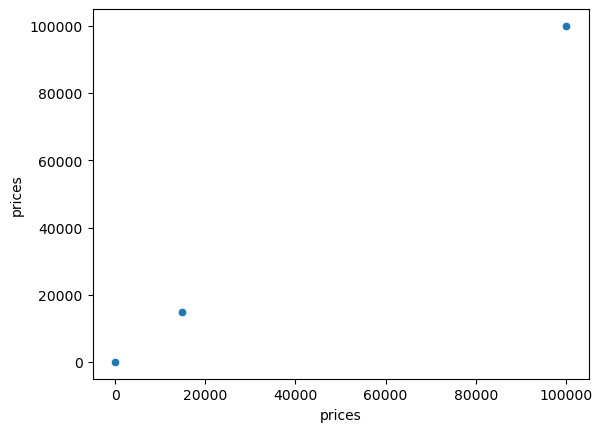

In [8]:
# Creating scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [9]:
# Checking for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,amount_of_orders_made,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest day,busiest days,Busiest Order Periods,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest Orders,40,Regular customer,14900.0,high_spender,999.0,non_frequent_customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest Orders,40,Regular customer,14900.0,high_spender,999.0,non_frequent_customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,14900.0,high_spender,999.0,non_frequent_customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average Orders,4,New customer,14900.0,high_spender,999.0,non_frequent_customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average Orders,16,Regular customer,14900.0,high_spender,999.0,non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average Orders,39,Regular customer,99999.0,high_spender,999.0,non_frequent_customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Fewest Orders,39,Regular customer,99999.0,high_spender,999.0,non_frequent_customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Fewest Orders,15,Regular customer,99999.0,high_spender,999.0,non_frequent_customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Average Orders,12,Regular customer,99999.0,high_spender,999.0,non_frequent_customer


In [10]:
ords_prods_merge.loc[:,'prices']

0            9.0
1            9.0
2            9.0
3            9.0
4            9.0
            ... 
32404854     3.7
32404855     3.7
32404856     6.9
32404857     6.9
32404858    10.3
Name: prices, Length: 32404859, dtype: float64

In [11]:
# Turning outliers into NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
# Checking whether replacement was successful
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

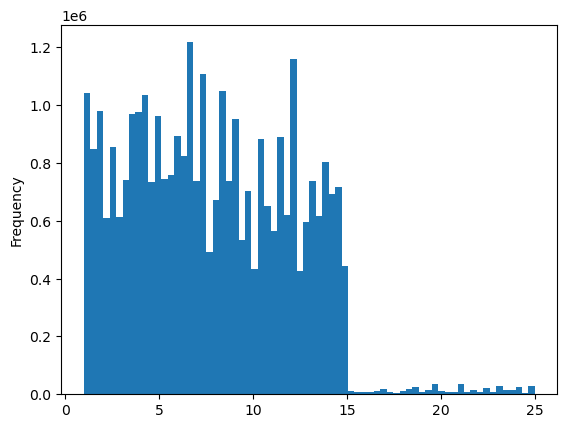

In [13]:
# Creating a Histogram (2nd Try)
ords_prods_merge['prices'].plot.hist(bins = 70)

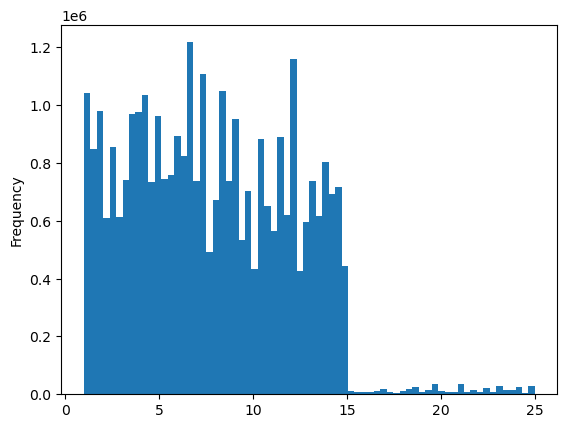

In [14]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

In [16]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [19]:
len(ords_prods_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
df_2 = small[['order_day_of_week','prices']]

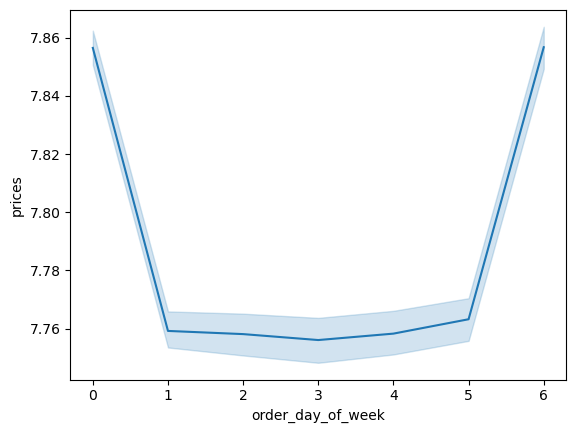

In [22]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')